In [1]:
from fastai.vision.all import *
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision import gan
from fastai.vision.gan import *
import torch

In [2]:
dls = torch.load(r"../../data/train/GAN_dataloader.pkl")

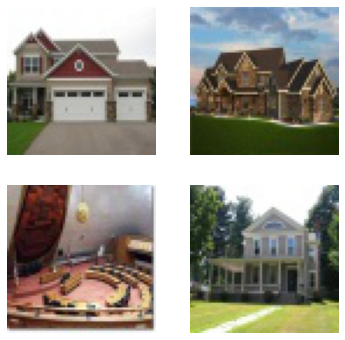

In [3]:
dls.show_batch(max_n=4)

## Making the learner

### First I will train the model for just 1 epoch and see what the model generates

In [61]:
generator = basic_generator(64, n_channels=3, n_extra_layers=1)
critic = basic_critic(64, n_channels=3, n_extra_layers=1, act_cls=partial(nn.LeakyReLU, negative_slope=0.2))

In [62]:
learn = GANLearner.wgan(dls,
                        generator,
                        critic,
                        switcher=FixedGANSwitcher, # default: FixedGANSwitcher(n_crit:int=1, n_gen:int=1)
                        gen_first=False,
                        opt_func = RMSProp,
                        model_dir=r"E:\Work\Data_Science\Projects\Custom_GAN\models")

In [63]:
learn.recorder.train_metrics=True
learn.recorder.valid_metrics=False

In [64]:
learn.fit(2, 1e-4, wd=0.)

epoch,train_loss,gen_loss,crit_loss,time
0,-0.080614,0.252821,-0.414236,00:03
1,-0.177776,0.498400,-0.931560,00:01


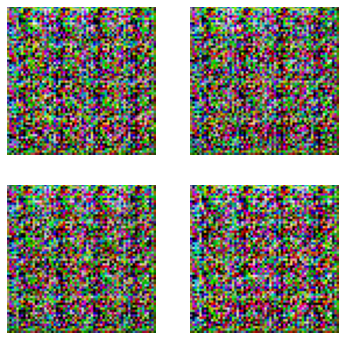

In [65]:
learn.show_results(max_n=4, ds_idx=0)

### As we can see that the generaed images still look pretty much like random noise

### Now it's time to train this for longer epochs

In [69]:
generator = basic_generator(64, n_channels=3, n_extra_layers=1)
critic = basic_critic(64, n_channels=3, n_extra_layers=1, act_cls=partial(nn.LeakyReLU, negative_slope=0.2))

learn = GANLearner.wgan(dls,
                        generator,
                        critic,
                        switcher=FixedGANSwitcher, # default: FixedGANSwitcher(n_crit:int=1, n_gen:int=1)
                        gen_first=False,
                        opt_func = RMSProp,
                        show_img=True,
                        model_dir=r"E:\Work\Data_Science\Projects\Custom_GAN\models")

learn.recorder.train_metrics=True
learn.recorder.valid_metrics=False

In [70]:
learn.fit(100, 1e-5, wd=0.)

epoch,train_loss,gen_loss,crit_loss,time
0,-0.005678,0.014817,-0.026011,00:01
1,-0.016139,0.026822,-0.068136,00:01
2,-0.025940,0.035602,-0.100931,00:01
3,-0.035771,0.053250,-0.142282,00:01
4,-0.044972,0.077421,-0.185399,00:01
5,-0.054367,0.101235,-0.228586,00:01
6,-0.063062,0.124220,-0.268602,00:01
7,-0.073881,0.147938,-0.317671,00:01
8,-0.085398,0.169118,-0.363286,00:01
9,-0.094973,0.191257,-0.402052,00:01


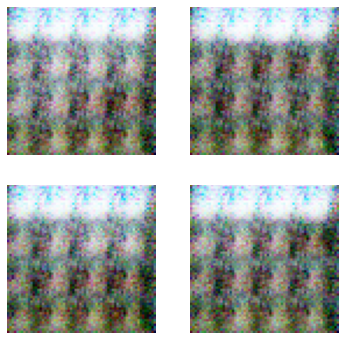

In [80]:
learn.show_results(max_n=4, ds_idx=0)

### By looking at the above images, we can't say that they are anywhere close to house/ homes. However it is intutive that they are not random noise and the model is trying to generate some pattern where the top part is probably the sky, bottom part is ground and there is something in the middle.

### Save the model

In [74]:
learner.export(r"..\..\models\GAN_model.pkl")

In [82]:
learner.save(r"GAN_model")

Path('E:/Work/Data_Science/Projects/Custom_GAN/models/GAN_model.pth')

In [84]:
model = load_learner(r"..\..\models\GAN_model.pkl")

In [77]:
dir(model)

['T_destination',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__stored_args__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward',
 '_backward_hooks',
 '_bn_bias_state',
 '_buffers',
 '_call_impl',
 '_call_one',
 '_component_attr_filter',
 '_default',
 '_dir',
 '_do_epoch',
 '_do_epoch_train',
 '_do_epoch_validate',
 '_do_fit',
 '_do_one_batch',
 '_end_cleanup',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_get_backward_hooks',
 '_get_name',
 '_grab_cbs',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_h

In [86]:
model.predict()

TypeError: predict() missing 1 required positional argument: 'item'

In [91]:
fixed_noise = InvisibleTensor(torch.randn(64, 3, 1, 1))

In [94]:
pred_img = model.predict(fixed_noise)[0]

In [ ]:
import matplotlib.pyplot as plt
plt.ims